# FINAL PROJECT DATA MINING



> ## Kelas Data Mining B
> #### - Rendi Panca Wijanarko (21082010016)
> #### - Maulana Bryan Syahputra (210820038)
> #### - Syauqillah Hadie Ahsana (21082010042)

# EDA (Exploratory Data Analysis)

In [ ]:
# Import library untuk analisis data
import numpy as np
import pandas as pd

# Import library untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Data
df = pd.read_csv ('https://raw.githubusercontent.com/syha-studio/FinalProjectDataMining/refs/heads/main/Indeks%20Standar%20Pencemaran%20Udara%20(ISPU)%20Tahun%202021%20-%202022.xlsx%20-%20Fixed%20Data.csv')

In [ ]:
df.head()

,Periode Data,Tanggal,Stasiun,PM10,"PM2,5",SO2,CO,O3,NO2,MAX,Critical,Category
0,202101,1/22/2021,DKI5,45.0,NaN,21.0,13.0,40.0,15.0,45,PM10,BAIK
1,202101,1/23/2021,DKI5,80.0,NaN,22.0,44.0,44.0,22.0,80,PM10,SEDANG
2,202101,1/24/2021,DKI5,27.0,NaN,14.0,9.0,29.0,NaN,29,CO,BAIK
3,202101,1/25/2021,DKI5,55.0,NaN,19.0,29.0,67.0,13.0,67,CO,SEDANG
4,202101,1/26/2021,DKI5,57.0,NaN,21.0,23.0,36.0,16.0,57,PM10,SEDANG


In [ ]:
df.shape

(2190, 12)

In [ ]:
df.dtypes

,0
Periode Data,int64
Tanggal,object
Stasiun,object
PM10,float64
"PM2,5",float64
SO2,float64
CO,float64
O3,float64
NO2,float64
MAX,object


In [ ]:
df.describe()

,Periode Data,PM10,"PM2,5",SO2,CO,O3,NO2
count,2190.000000,2122.000000,2090.000000,2076.000000,2154.000000,2122.000000,2155.000000
mean,202123.192694,53.562205,80.655024,37.427746,13.020891,36.195570,21.204176
std,37.435498,14.683495,23.928070,12.676022,6.007584,19.150584,9.915056
min,202101.000000,14.000000,13.000000,2.000000,2.000000,7.000000,1.000000
25%,202104.000000,45.000000,65.000000,27.000000,9.000000,23.000000,14.000000
50%,202108.000000,55.000000,80.000000,39.000000,12.000000,31.000000,20.000000
75%,202111.000000,63.000000,95.000000,48.000000,16.000000,45.000000,27.000000
max,202212.000000,179.000000,174.000000,82.000000,55.000000,181.000000,65.000000


In [ ]:
df.isnull().sum()

,0
Periode Data,0
Tanggal,0
Stasiun,0
PM10,68
"PM2,5",100
SO2,114
CO,36
O3,68
NO2,35
MAX,0


In [ ]:
df['Category'].unique()

array(['BAIK', 'SEDANG', 'TIDAK SEHAT', 'TIDAK ADA DATA', nan],
      dtype=object)

## Delete Attribute Periode Data, Tanggal, Stasiun, Critical

In [ ]:
df = df.drop(columns=['Periode Data','Tanggal','Stasiun','MAX','Critical'])

In [ ]:
df.head(3)

,PM10,"PM2,5",SO2,CO,O3,NO2,Category
0,45.0,NaN,21.0,13.0,40.0,15.0,BAIK
1,80.0,NaN,22.0,44.0,44.0,22.0,SEDANG
2,27.0,NaN,14.0,9.0,29.0,NaN,BAIK


## Delete Row dengan Kategori "TIDAK ADA DATA"

In [ ]:
df = df[df['Category'] != "TIDAK ADA DATA"]

In [ ]:
df['Category'].unique()

array(['BAIK', 'SEDANG', 'TIDAK SEHAT', nan], dtype=object)

## Handling Missing Value

In [ ]:
df.isnull().sum()

,0
PM10,52
"PM2,5",84
SO2,98
CO,20
O3,52
NO2,19
Category,1


In [ ]:
df = df.dropna(subset=['Category'])

In [ ]:
df.isnull().sum()

,0
PM10,52
"PM2,5",84
SO2,98
CO,20
O3,52
NO2,19
Category,0


In [ ]:
# Using Imputation According to Category
df['PM10'] = df.groupby('Category')['PM10'].transform(lambda x: x.fillna(x.median()))
df['PM2,5'] = df.groupby('Category')['PM2,5'].transform(lambda x: x.fillna(x.median()))
df['SO2'] = df.groupby('Category')['SO2'].transform(lambda x: x.fillna(x.median()))
df['CO'] = df.groupby('Category')['CO'].transform(lambda x: x.fillna(x.median()))
df['O3'] = df.groupby('Category')['O3'].transform(lambda x: x.fillna(x.median()))
df['NO2'] = df.groupby('Category')['NO2'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.isnull().sum()

,0
PM10,0
"PM2,5",0
SO2,0
CO,0
O3,0
NO2,0
Category,0


## Detecting and Handling Outlier

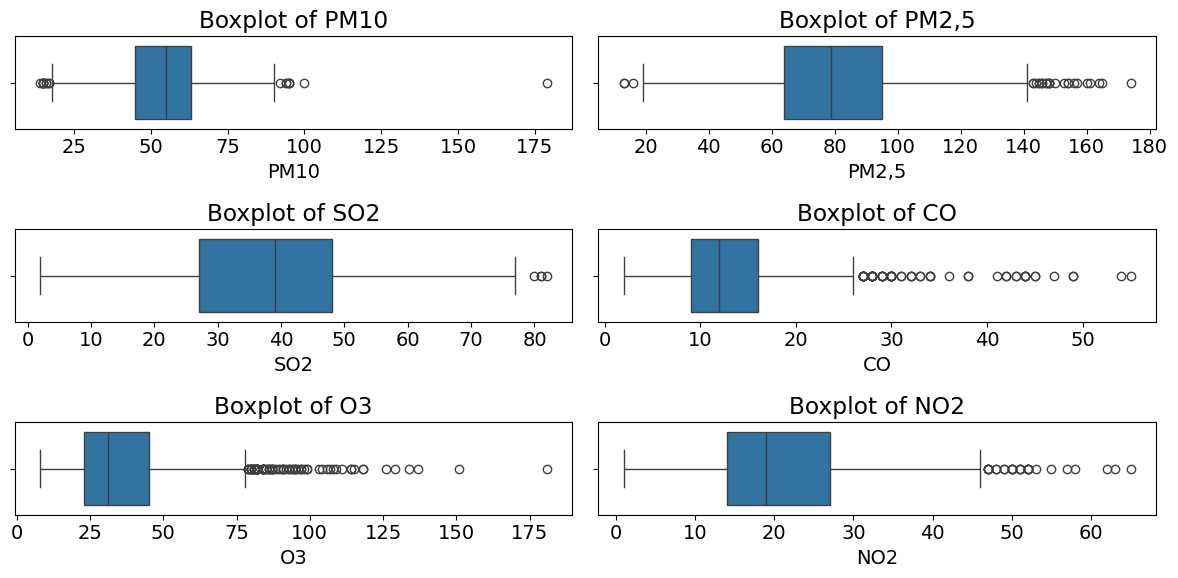

In [ ]:
# detecting using boxplot (seaborn)
columns = [col for col in df.columns if col != 'Category']
n = len(columns)
rows = (n + 1) // 2

plt.figure(figsize=(12, rows * 2))
for i, column in enumerate(columns, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

# Show the plot
plt.show()

> #### Tidak Perlu Handling Outliers Karena Data Outliers Masuk Akal

## DATA TRANSFORMATION

In [ ]:
Category = {"TIDAK SEHAT":1, "SEDANG":2, "BAIK":3}
df["Category"]=df["Category"].map(Category)

## Feature Selection

In [ ]:
def ISPU_Correlation(df):
    correlation = df.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

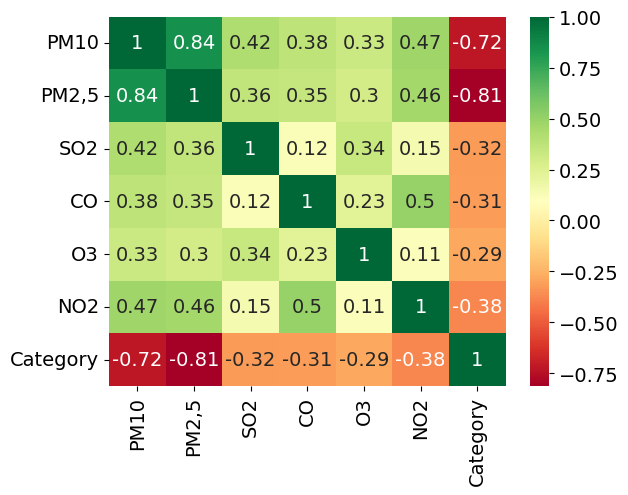

In [ ]:
data_numerik = df.select_dtypes(include=['float64', 'int64'])
ISPU_Correlation(data_numerik)

> #### Dari Grafik Korelasi, semua atribut memiliki korelasi tinggi terhadap Category. Oleh karena itu semua atribut akan digunakan untuk membuat model klasifikasi

# Pembuatan Model Klasifikasi

### Algoritma yang digunakan
> #### Decision Tree
> > **Alasan:** Decision Tree bisa memberikan hasil yang baik dengan dataset ukuran ini dan memberikan visualisasi yang jelas tentang keputusan yang diambil.
> #### Random Forest
> > **Alasan:** Dibandingkan Decision Tree tunggal, Random Forest lebih tahan terhadap overfitting karena menggabungkan hasil dari banyak pohon (ensemble).

In [ ]:
# Import Library Algorithm
from sklearn.model_selection import train_test_split
# Import Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)
# import Crossval
from sklearn.model_selection import cross_val_score

In [ ]:
X = df[['PM10', 'PM2,5', 'SO2', 'CO', 'O3','NO2']]
y = df['Category']

## Skenario Perbandingan 70% -30%

In [ ]:
# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

### Decission Tree Algorithm

In [ ]:
# Initializing the Decision Tree model
clf=DecisionTreeClassifier()
# Fitting the model on the training data
clf=clf.fit(X_train,y_train)
# Making predictions on the test data
y_pred=clf.predict(X_test)
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Outputting the results
print('Confusion Matrix:')
print(conf_matrix)
print('--------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[119   0   0]
 [  0 476   2]
 [  0   1  54]]
--------------
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       478
           3       0.96      0.98      0.97        55

    accuracy                           1.00       652
   macro avg       0.99      0.99      0.99       652
weighted avg       1.00      1.00      1.00       652



### Random Forest

In [ ]:
# Initializing the RandomForest
modelfix = RandomForestClassifier()
# Fitting the model on the training data
modelfix = modelfix.fit(X_train, y_train)
# Making predictions on the test data
y_pred = modelfix.predict(X_test)
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Outputting the results
print('Confusion Matrix:')
print(conf_matrix)
print('--------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[118   1   0]
 [  0 477   1]
 [  0   0  55]]
--------------
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       119
           2       1.00      1.00      1.00       478
           3       0.98      1.00      0.99        55

    accuracy                           1.00       652
   macro avg       0.99      1.00      0.99       652
weighted avg       1.00      1.00      1.00       652



## Evaluasi Model Klasifikasi Skenario Perbandingan 70% -30%

> ### HOLD - OUT

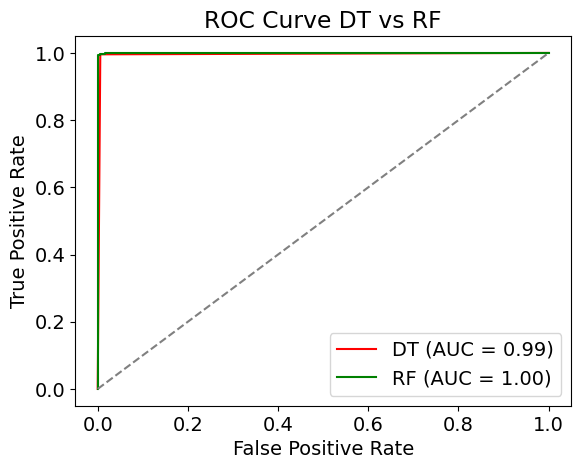

In [ ]:
# Menghitung ROC-AUC untuk model Decision Tree
dt_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='macro')

# Membuat ROC curve untuk Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=clf.classes_[1])

# Menghitung ROC-AUC untuk model Random Forest
rf_roc_auc = roc_auc_score(y_test, modelfix.predict_proba(X_test), multi_class='ovr', average='macro')

# Membuat ROC curve untuk Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, modelfix.predict_proba(X_test)[:, 1], pos_label=modelfix.classes_[1])

# Plotting ROC curve untuk Decision Tree dan Random Forest
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='red', label=f'DT (AUC = {dt_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='green', label=f'RF (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal garis referensi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT vs RF')
plt.legend(loc='lower right')
plt.show()

> ### CROSS-VAL

> > ###  Decision Tree

In [ ]:
scores_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(scores_accuracy)
scores_precission = cross_val_score(clf, X, y, cv=5, scoring="precision_macro")
print(scores_precission)
scores_recall = cross_val_score(clf, X, y, cv=5, scoring="recall_macro")
print(scores_recall)
scores_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1_macro")
print(scores_f1)

[1.         0.99770115 1.         0.99078341 0.99539171]
[1.         0.97560976 1.         0.99582027 0.98333333]
[1.         0.9968254  1.         0.96956898 0.99787686]
[1.         0.99514105 1.         0.98212793 0.99038803]


In [ ]:
print("Rata-rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("Rata-rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precission.mean(), scores_precission.std()))
print("Rata-rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("Rata-rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

Rata-rata Nilai Akurasi: 1.00 (+/- 0.00)
Rata-rata Nilai Precision Macro: 0.99 (+/- 0.01)
Rata-rata Nilai Recall Macro: 0.99 (+/- 0.01)
Rata-rata Nilai F1 Macro: 0.99 (+/- 0.01)


> > ###  Random Forest

In [ ]:
scores_accuracy = cross_val_score(modelfix, X, y, cv=5, scoring="accuracy")
print(scores_accuracy)
scores_precission = cross_val_score(modelfix, X, y, cv=5, scoring="precision_macro")
print(scores_precission)
scores_recall = cross_val_score(modelfix, X, y, cv=5, scoring="recall_macro")
print(scores_recall)
scores_f1 = cross_val_score(modelfix, X, y, cv=5, scoring="f1_macro")
print(scores_f1)

[0.95402299 1.         1.         0.98156682 0.98156682]
[0.88888889 1.         1.         0.99174407 0.9494756 ]
[0.97989418 0.99593496 1.         0.93090752 0.99363057]
[0.92296781 1.         1.         0.96886293 0.96477521]


In [ ]:
print("Rata-rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("Rata-rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precission.mean(), scores_precission.std()))
print("Rata-rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("Rata-rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

Rata-rata Nilai Akurasi: 0.98 (+/- 0.02)
Rata-rata Nilai Precision Macro: 0.97 (+/- 0.04)
Rata-rata Nilai Recall Macro: 0.98 (+/- 0.03)
Rata-rata Nilai F1 Macro: 0.97 (+/- 0.03)


## Skenario Perbandingan 60% - 40%

In [ ]:
# Splitting the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=27)

### Decission Tree Algorithm

In [ ]:
# Initializing the Decision Tree model
clf=DecisionTreeClassifier()
# Fitting the model on the training data
clf=clf.fit(X_train,y_train)
# Making predictions on the test data
y_pred=clf.predict(X_test)
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Outputting the results
print('Confusion Matrix:')
print(conf_matrix)
print('--------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[156   0   0]
 [  0 640   4]
 [  0   1  69]]
--------------
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       156
           2       1.00      0.99      1.00       644
           3       0.95      0.99      0.97        70

    accuracy                           0.99       870
   macro avg       0.98      0.99      0.99       870
weighted avg       0.99      0.99      0.99       870



### Random Forest

In [ ]:
# Initializing the RandomForest
model = RandomForestClassifier()
# Fitting the model on the training data
model = model.fit(X_train, y_train)
# Making predictions on the test data
y_pred = model.predict(X_test)
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Outputting the results
print('Confusion Matrix:')
print(conf_matrix)
print('--------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[155   1   0]
 [  0 642   2]
 [  0   2  68]]
--------------
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       156
           2       1.00      1.00      1.00       644
           3       0.97      0.97      0.97        70

    accuracy                           0.99       870
   macro avg       0.99      0.99      0.99       870
weighted avg       0.99      0.99      0.99       870



## Evaluasi Model Klasifikasi Skenario Perbandingan 60% -40%

> ### HOLD - OUT

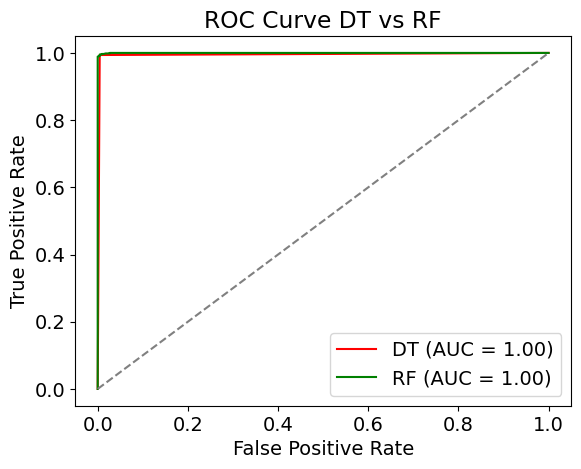

In [ ]:
# Menghitung ROC-AUC untuk model Decision Tree
dt_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='macro')

# Membuat ROC curve untuk Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=clf.classes_[1])

# Menghitung ROC-AUC untuk model Random Forest
rf_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')

# Membuat ROC curve untuk Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=model.classes_[1])

# Plotting ROC curve untuk Decision Tree dan Random Forest
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='red', label=f'DT (AUC = {dt_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='green', label=f'RF (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal garis referensi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT vs RF')
plt.legend(loc='lower right')
plt.show()

> ### CROSS-VAL

> > ###  Decision Tree

In [ ]:
scores_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(scores_accuracy)
scores_precission = cross_val_score(clf, X, y, cv=5, scoring="precision_macro")
print(scores_precission)
scores_recall = cross_val_score(clf, X, y, cv=5, scoring="recall_macro")
print(scores_recall)
scores_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1_macro")
print(scores_f1)

[1.         0.99770115 1.         0.99078341 0.99539171]
[1.         0.97560976 1.         0.99582027 0.98333333]
[1.         0.9989418  1.         0.96956898 0.99787686]
[1.         0.98574688 1.         0.98212793 0.99038803]


In [ ]:
print("Rata-rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("Rata-rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precission.mean(), scores_precission.std()))
print("Rata-rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("Rata-rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

Rata-rata Nilai Akurasi: 1.00 (+/- 0.00)
Rata-rata Nilai Precision Macro: 0.99 (+/- 0.01)
Rata-rata Nilai Recall Macro: 0.99 (+/- 0.01)
Rata-rata Nilai F1 Macro: 0.99 (+/- 0.01)


> > ###  Random Forest

In [ ]:
scores_accuracy = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(scores_accuracy)
scores_precission = cross_val_score(model, X, y, cv=5, scoring="precision_macro")
print(scores_precission)
scores_recall = cross_val_score(model, X, y, cv=5, scoring="recall_macro")
print(scores_recall)
scores_f1 = cross_val_score(model, X, y, cv=5, scoring="f1_macro")
print(scores_f1)

[0.95402299 0.99770115 1.         0.98387097 0.98617512]
[0.88776655 0.99894515 1.         0.99174407 0.96031746]
[0.97883598 1.         1.         0.93036604 0.99150743]
[0.92296781 1.         1.         0.95468593 0.96983217]


In [ ]:
print("Rata-rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("Rata-rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precission.mean(), scores_precission.std()))
print("Rata-rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("Rata-rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

Rata-rata Nilai Akurasi: 0.98 (+/- 0.02)
Rata-rata Nilai Precision Macro: 0.97 (+/- 0.04)
Rata-rata Nilai Recall Macro: 0.98 (+/- 0.03)
Rata-rata Nilai F1 Macro: 0.97 (+/- 0.03)


# MODEL TERBAIK UNTUK DEPLOYMENT

# TERPILIH : RANDOM FOREST (70-30)